Code for threshoding and edge detection
(We havent got a good recall for this part but this is whatever we've tried till now in that part, will try to correct the code by identifying our mistakes)  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/MyDrive/Copy of iitisoc_ps1'

sar_dataset


In [ ]:
!ls '/content/drive/MyDrive/Copy of iitisoc_ps1/sar_dataset/Train_Val_Oil_Spill_images/Oil'

00000.tif  00213.tif  00417.tif  00603.tif  00793.tif  00969.tif  01157.tif
00001.tif  00214.tif  00418.tif  00604.tif  00794.tif  00970.tif  01158.tif
00002.tif  00215.tif  00419.tif  00605.tif  00795.tif  00971.tif  01159.tif
00003.tif  00216.tif  00421.tif  00606.tif  00796.tif  00972.tif  01160.tif
00004.tif  00217.tif  00422.tif  00607.tif  00797.tif  00973.tif  01162.tif
00005.tif  00218.tif  00423.tif  00608.tif  00798.tif  00974.tif  01163.tif
00006.tif  00219.tif  00424.tif  00609.tif  00799.tif  00975.tif  01164.tif
00007.tif  00220.tif  00425.tif  00610.tif  00800.tif  00976.tif  01165.tif
00008.tif  00223.tif  00426.tif  00611.tif  00801.tif  00977.tif  01166.tif
00009.tif  00224.tif  00427.tif  00612.tif  00802.tif  00978.tif  01167.tif
00010.tif  00227.tif  00428.tif  00613.tif  00803.tif  00979.tif  01168.tif
00011.tif  00228.tif  00429.tif  00614.tif  00804.tif  00980.tif  01169.tif
00012.tif  00231.tif  00430.tif  00615.tif  00805.tif  00981.tif  01170.tif
00013.tif  0

In [ ]:
!ls '/content/drive/MyDrive/Copy of iitisoc_ps1/sar_dataset/Train_Val_Oil_Spill_mask/Mask_oil'

00000.tif  00213.tif  00417.tif  00603.tif  00793.tif  00969.tif  01157.tif
00001.tif  00214.tif  00418.tif  00604.tif  00794.tif  00970.tif  01158.tif
00002.tif  00215.tif  00419.tif  00605.tif  00795.tif  00971.tif  01159.tif
00003.tif  00216.tif  00421.tif  00606.tif  00796.tif  00972.tif  01160.tif
00004.tif  00217.tif  00422.tif  00607.tif  00797.tif  00973.tif  01162.tif
00005.tif  00218.tif  00423.tif  00608.tif  00798.tif  00974.tif  01163.tif
00006.tif  00219.tif  00424.tif  00609.tif  00799.tif  00975.tif  01164.tif
00007.tif  00220.tif  00425.tif  00610.tif  00800.tif  00976.tif  01165.tif
00008.tif  00223.tif  00426.tif  00611.tif  00801.tif  00977.tif  01166.tif
00009.tif  00224.tif  00427.tif  00612.tif  00802.tif  00978.tif  01167.tif
00010.tif  00227.tif  00428.tif  00613.tif  00803.tif  00979.tif  01168.tif
00011.tif  00228.tif  00429.tif  00614.tif  00804.tif  00980.tif  01169.tif
00012.tif  00231.tif  00430.tif  00615.tif  00805.tif  00981.tif  01170.tif
00013.tif  0

In [ ]:
pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 85.5 MB/s eta 0:00:00


In [ ]:
import rasterio

with rasterio.open('/content/drive/MyDrive/Copy of iitisoc_ps1/sar_dataset/Train_Val_Oil_Spill_images/Oil/00000.tif') as img:
    print("Number of channels:", img.count)


    print("Image shape (height, width):", img.height, img.width)
    print("Metadata:", img.meta)
    band1 = img.read(1)
    band2 = img.read(2)

Number of channels: 2
Image shape (height, width): 2048 2048
Metadata: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 2048, 'height': 2048, 'count': 2, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(8.983152841195215e-05, 0.0, 3.9656639450910203,
       0.0, -8.983152841195215e-05, 55.33396508271642)}


In [ ]:
transform = Affine(8.983152841195215e-05, 0.0, 3.9656639450910203,0.0, -8.983152841195215e-05, 55.33396508271642)

col, row = 0, 0  # upper-left pixel
lon, lat = transform * (col, row)
print(lon, lat)  # Should print the upper-left corner coordinates

3.9656639450910203 55.33396508271642


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

def normalize_to_grayscale(img): #Normalize image to 0–255
    img_min = np.min(img)
    img_max = np.max(img)
    img_norm = (img - img_min) / (img_max - img_min)
    img_gray = (img_norm * 255).astype(np.uint8)
    return img_gray
def show_image(img_gray):
    plt.imshow(img_gray, cmap='gray', interpolation = 'nearest')
    plt.axis('off')
    plt.show()

**Channel 1**

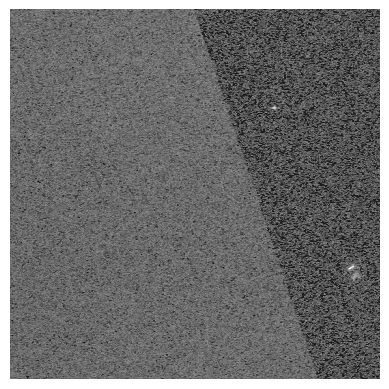

In [ ]:
channel1_grayscale = normalize_to_grayscale(band1)
show_image(channel1_grayscale)

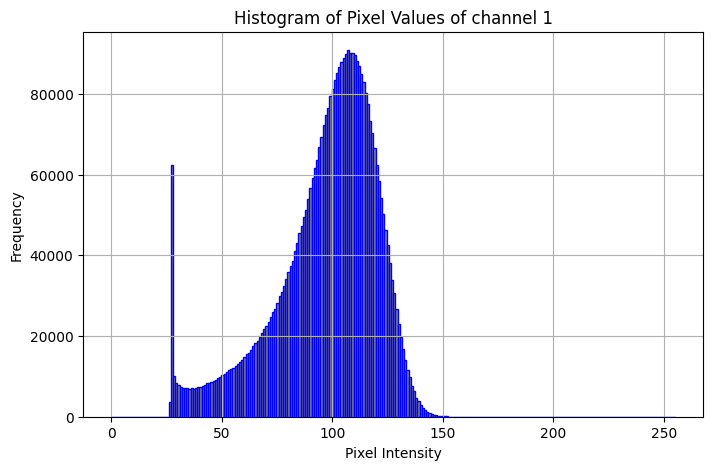

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(channel1_grayscale.ravel(), bins=256, range=(0, 255), color='gray', edgecolor='blue')
plt.title('Histogram of Pixel Values of channel 1')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:

from scipy.ndimage import uniform_filter

def kuan_filter(img, size=5, cu=0.25):

    img = img.astype(np.float32)

    # Local statistics
    mean = uniform_filter(img, size)
    mean_sq = uniform_filter(img ** 2, size)
    variance = mean_sq - mean ** 2

    # Avoid division by zero
    mean[mean == 0] = 1e-5

    # Coefficient of variation
    ci = variance / (mean ** 2)
    cu2 = cu ** 2

    # Compute filter weights
    W = 1 / (1 + (cu2 / (ci + 1e-5)))

    # Apply the filter
    output = mean + W * (img - mean)
    return output.astype(np.uint8)


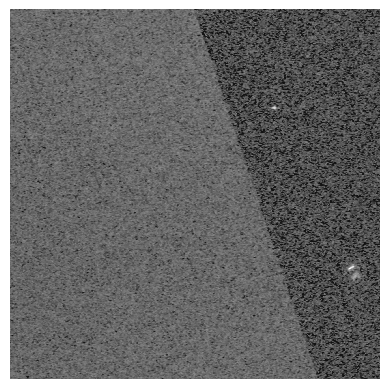

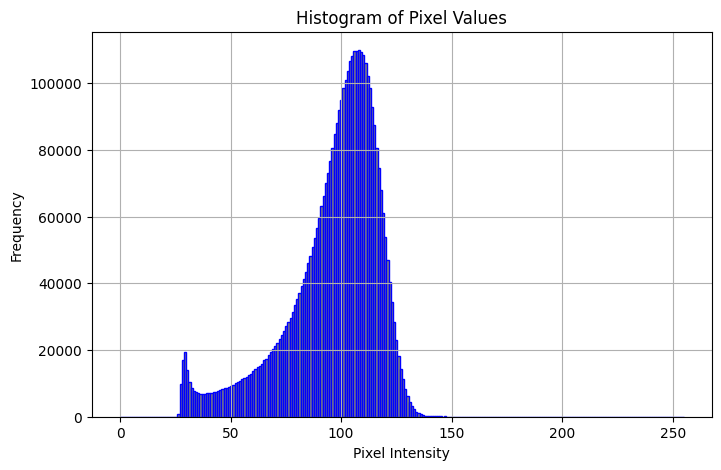

In [ ]:
filtered_kuan = kuan_filter(channel1_grayscale, size=5)
show_image(filtered_kuan)

plt.figure(figsize=(8, 5))
plt.hist(filtered_kuan.ravel(), bins=256, range=(0, 255), color='gray', edgecolor='blue')
plt.title('Histogram of Pixel Values')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Otsu's threshold value: 84.0


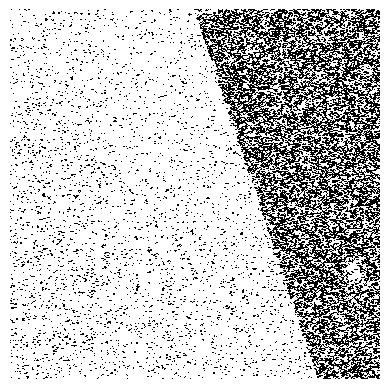

In [ ]:
#Apply Otsu thresholding
thresh_val, bin_img = cv2.threshold(filtered_kuan, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print("Otsu's threshold value:", thresh_val)
show_image(bin_img)

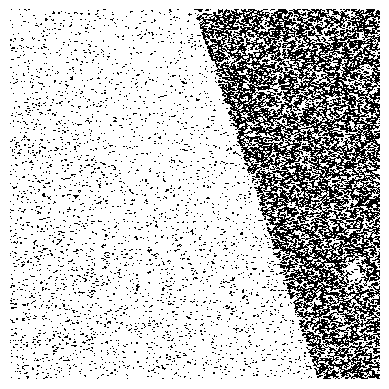

In [ ]:
kernel = np.ones((3, 3), np.uint8)
cleaned = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN, kernel)
show_image(cleaned)

**Channel 2**

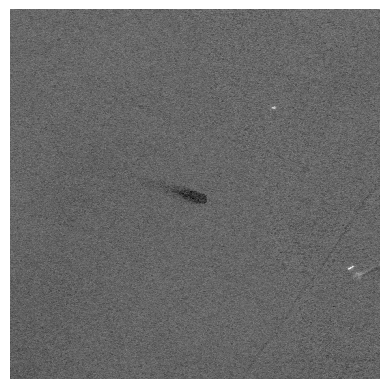

In [ ]:
channel2_grayscale = normalize_to_grayscale(band2)
show_image(channel2_grayscale)

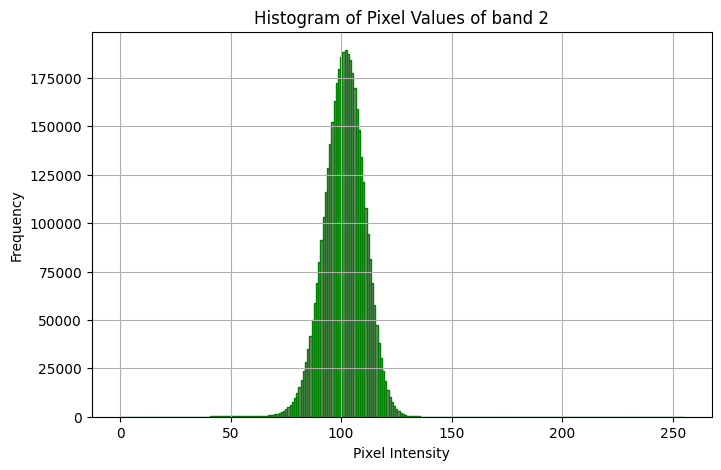

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(channel2_grayscale.ravel(), bins=256, range=(0, 255), color='gray', edgecolor='green')
plt.title('Histogram of Pixel Values of band 2')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

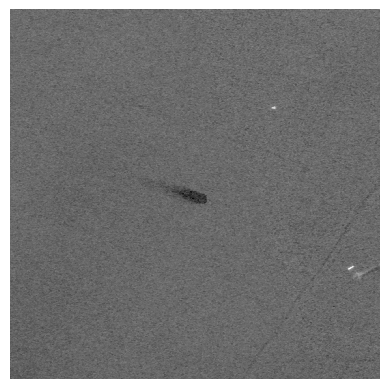

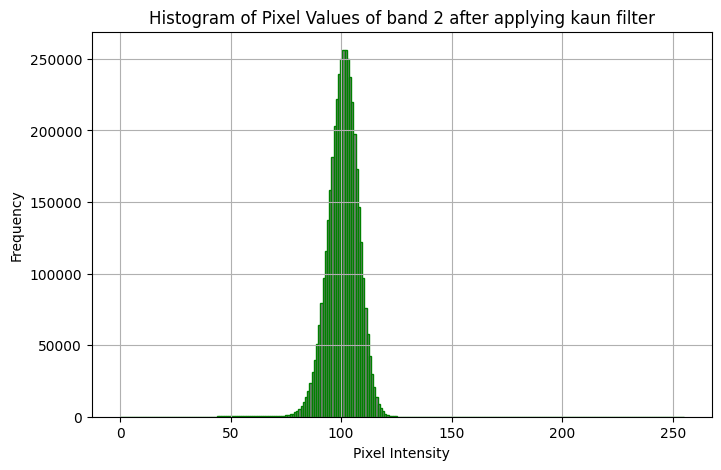

In [ ]:
filtered_kuan2 = kuan_filter(channel2_grayscale, size=5)
show_image(filtered_kuan2)


plt.figure(figsize=(8, 5))
plt.hist(filtered_kuan2.ravel(), bins=256, range=(0, 255), color='gray', edgecolor='green')
plt.title('Histogram of Pixel Values of band 2 after applying kaun filter')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Otsu's threshold value: 100.0


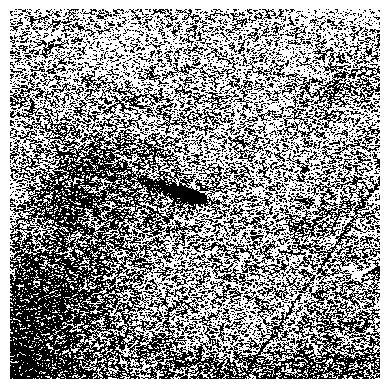

In [ ]:
# Apply Otsu thresholding
thresh_val2, bin_img2 = cv2.threshold(filtered_kuan2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print("Otsu's threshold value:", thresh_val2)
show_image(bin_img2)

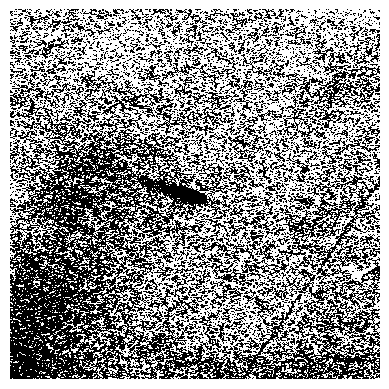

In [ ]:
kernel = np.ones((3, 3), np.uint8)
cleaned2 = cv2.morphologyEx(bin_img2, cv2.MORPH_OPEN, kernel)
show_image(cleaned2)

**Combined both channel**

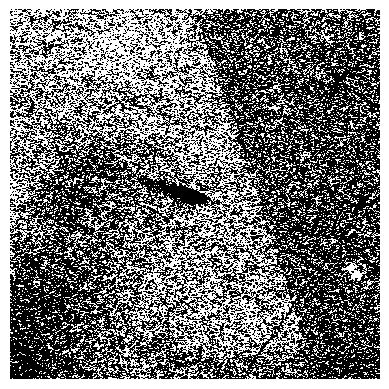

In [ ]:
combined_bothchannel = cv2.bitwise_and(bin_img, bin_img2)
show_image(combined_bothchannel)

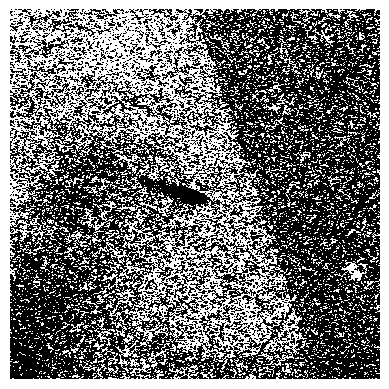

In [ ]:
# Define a kernel (adjust size as needed)
kernel = np.ones((3, 3), np.uint8)

# Step 1: Remove small noise
opened = cv2.morphologyEx(combined_bothchannel, cv2.MORPH_OPEN, kernel)

# Step 2: Fill small holes
cleaned_mask = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)

# Show the cleaned image
show_image(cleaned_mask)

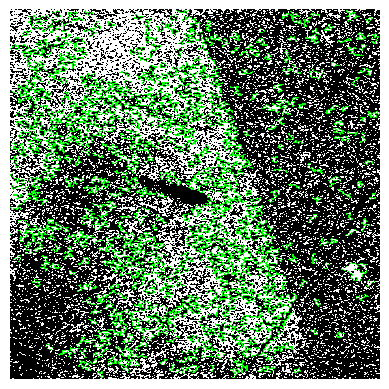

In [ ]:
# Step 1: Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Step 2: Draw bounding  on a blank canvas or original image
output = cv2.cvtColor(cleaned_mask, cv2.COLOR_GRAY2BGR)

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    if cv2.contourArea(cnt) > 500:  # Filter small areas
        cv2.drawContours(output, [cnt], -1, (0, 255, 0), 2)


# Step 3: Show result
show_image(output)


In [ ]:
from PIL import Image
# Suppose this is your predicted mask from your model:
predicted_img = output # your NumPy array, shape (H, W) or (H, W, 3)

# Convert to uint8 if needed
if predicted_img.dtype != np.uint8:
    predicted_img = (predicted_img * 255).astype(np.uint8)

# Save to disk
predicted_path = 'predicted_00002.tif'
Image.fromarray(predicted_img).save(predicted_path)


In [ ]:


# Load your images (replace with your actual file paths)
predicted_img = np.array(Image.open(predicted_path))


with rasterio.open('/content/drive/MyDrive/Copy of iitisoc_ps1/sar_dataset/Train_Val_Oil_Spill_mask/Mask_oil/00000.tif') as src:
    ground_truth_img = src.read(1)  # Read the first band as a NumPy array


def check_array_format(array, name):
    print(f"\n--- {name} ---")
    print(f"Shape: {array.shape}")
    print(f"Data type: {array.dtype}")
    print(f"Unique values: {np.unique(array)}")
    print(f"Min value: {array.min()}")
    print(f"Max value: {array.max()}")
    print(f"Is binary (0,1): {set(np.unique(array)) <= {0, 1}}")

# Check current format
check_array_format(predicted_img, "Predicted Image")
check_array_format(ground_truth_img, "Ground Truth Image")


/usr/local/lib/python3.11/dist-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)



--- Predicted Image ---
Shape: (2048, 2048, 3)
Data type: uint8
Unique values: [  0 255]
Min value: 0
Max value: 255
Is binary (0,1): False

--- Ground Truth Image ---
Shape: (2048, 2048)
Data type: uint8
Unique values: [0 1]
Min value: 0
Max value: 1
Is binary (0,1): True


In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Convert predicted image to single channel and binary
if predicted_img.ndim == 3:
    predicted_binary = predicted_img[..., 1]

else:
    predicted_binary = predicted_img

# Convert from 0/255 to 0/1
predicted_binary = (predicted_binary > 127).astype(np.uint8)

# Ground truth is already in 0/1 format
ground_truth_binary = ground_truth_img.astype(np.uint8)

print(f"Predicted shape: {predicted_binary.shape}")
print(f"Ground truth shape: {ground_truth_binary.shape}")
print(f"Predicted unique values: {np.unique(predicted_binary)}")
print(f"Ground truth unique values: {np.unique(ground_truth_binary)}")

Predicted shape: (2048, 2048)
Ground truth shape: (2048, 2048)
Predicted unique values: [0 1]
Ground truth unique values: [0 1]


In [ ]:


# Example: predicted_mask and ground_truth_mask are both binary NumPy arrays of the same shape

# Flatten the arrays
pred = predicted_binary.flatten()
gt = ground_truth_binary.flatten()

# Calculate True Positives, False Positives, False Negatives
TP = np.sum((pred == 1) & (gt == 1))
FP = np.sum((pred == 1) & (gt == 0))
FN = np.sum((pred == 0) & (gt == 1))

# IoU
IoU = TP / (TP + FP + FN) if (TP + FP + FN) != 0 else 0

# Dice
Dice = (2 * TP) / (2 * TP + FP + FN) if (2 * TP + FP + FN) != 0 else 0

# Precision
Precision = TP / (TP + FP) if (TP + FP) != 0 else 0

# Recall
Recall = TP / (TP + FN) if (TP + FN) != 0 else 0

# F1-score
F1 = (2 * Precision * Recall) / (Precision + Recall) if (Precision + Recall) != 0 else 0

print(f"IoU: {IoU:.4f}")
print(f"Dice: {Dice:.4f}")
print(f"Precision: {Precision:.4f}")
print(f"Recall: {Recall:.4f}")
print(f"F1-score: {F1:.4f}")


IoU: 0.0000
Dice: 0.0000
Precision: 0.0000
Recall: 0.0026
F1-score: 0.0000


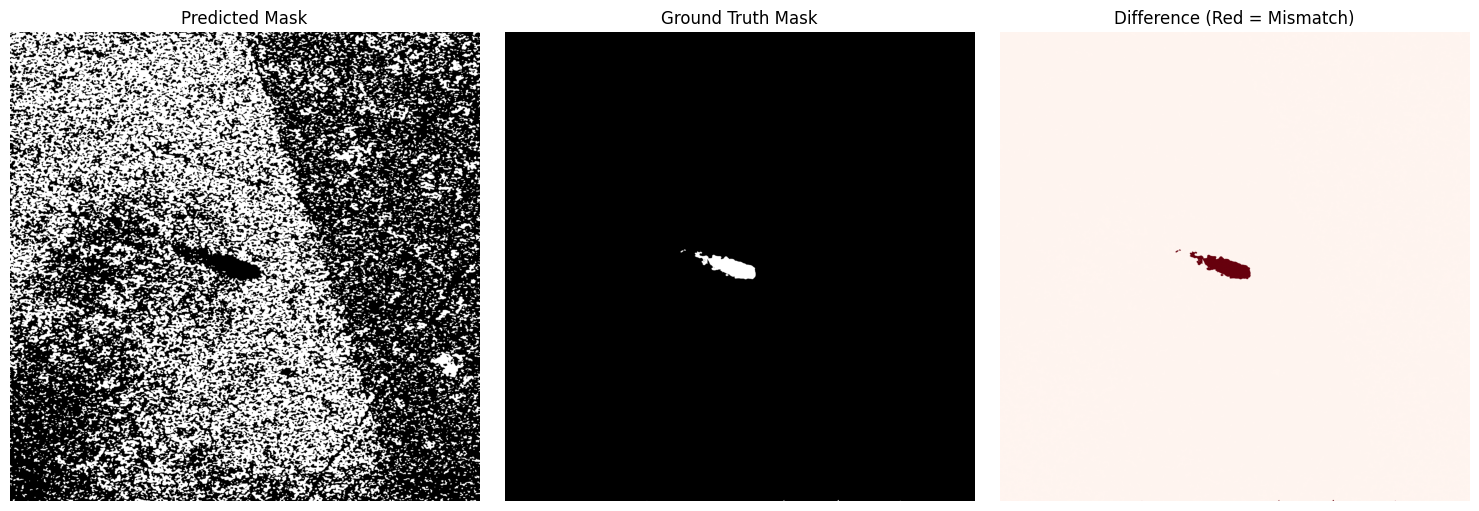

In [ ]:


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(predicted_binary, cmap='gray')
axes[0].set_title('Predicted Mask')
axes[0].axis('off')

axes[1].imshow(ground_truth_binary, cmap='gray')
axes[1].set_title('Ground Truth Mask')
axes[1].axis('off')

# Show difference
difference = np.abs(predicted_binary - ground_truth_binary)
axes[2].imshow(difference, cmap='Reds')
axes[2].set_title('Difference (Red = Mismatch)')
axes[2].axis('off')

plt.tight_layout()
plt.show()
